In [1]:
import pandas as pd
data = pd.read_csv("raw.csv")
data.head()

,Review_Content
0,must buy for gamers
1,been using it since an year no problem at all ...
2,caution price k is overprice now please buy i...
3,the cpu is overall great for everything itll g...
4,best processor in this price range best perfor...


In [2]:
data.columns = ['ReviewContent']
data.head()

,ReviewContent
0,must buy for gamers
1,been using it since an year no problem at all ...
2,caution price k is overprice now please buy i...
3,the cpu is overall great for everything itll g...
4,best processor in this price range best perfor...


In [3]:
data = data.dropna(subset=['ReviewContent'])

In [4]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\|\|', ' ', text)  # Replace || with space
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphabetic characters
    text = text.strip()  # Remove leading and trailing spaces
    return text

data['Review_Content'] = data['ReviewContent'].apply(clean_text)


In [5]:
data.head()

,ReviewContent,Review_Content
0,must buy for gamers,must buy for gamers
1,been using it since an year no problem at all ...,been using it since an year no problem at all ...
2,caution price k is overprice now please buy i...,caution price k is overprice now please buy i...
3,the cpu is overall great for everything itll g...,the cpu is overall great for everything itll g...
4,best processor in this price range best perfor...,best processor in this price range best perfor...


In [6]:
data.to_csv('final_dataset.csv', index=False)

In [7]:
data

,ReviewContent,Review_Content
0,must buy for gamers,must buy for gamers
1,been using it since an year no problem at all ...,been using it since an year no problem at all ...
2,caution price k is overprice now please buy i...,caution price k is overprice now please buy i...
3,the cpu is overall great for everything itll g...,the cpu is overall great for everything itll g...
4,best processor in this price range best perfor...,best processor in this price range best perfor...
...,...,...
2068,[CPU} Intel Core i7-13700KF - Core i7 13th Gen...,cpu intel core i713700kf core i7 13th gen rap...
2069,[MOBO] MSI PRO Z790-A MAX WiFi ProSeries Mothe...,mobo msi pro z790a max wifi proseries motherbo...
2070,[MOBO]ASUS ROG Maximus Z690 Hero(WiFi 6E) LGA ...,moboasus rog maximus z690 herowifi 6e lga 1700...
2071,ASUS TUF Gaming Z790-Plus WiFi LGA 1700(IntelÂ...,asus tuf gaming z790plus wifi lga 1700intel12t...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


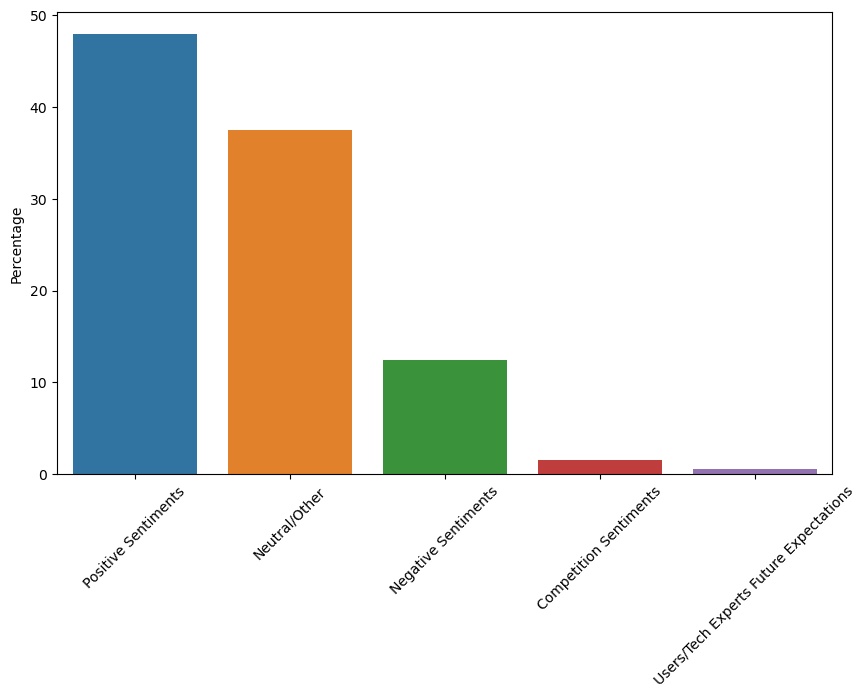

Positive Sentiments                       992
Neutral/Other                             777
Negative Sentiments                       258
Competition Sentiments                     32
Users/Tech Experts Future Expectations     11
Name: category, dtype: int64
Positive Sentiments                       47.922705
Neutral/Other                             37.536232
Negative Sentiments                       12.463768
Competition Sentiments                     1.545894
Users/Tech Experts Future Expectations     0.531401
Name: category, dtype: float64

Positive Sentiments examples: 

['caution  price k is overprice now please buy it under k only otherwise check some other applicationssites for better price',
 'the cpu is overall great for everything itll give you flaw less performance in mediocre level video editing and hardcore level gaming and streaming if you are looking to buy this just for gaming '
 'this is the perfect buy but the only thing disappointing is the stock cooler first of all

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

# Load the dataset with a different encoding
data = pd.read_csv("df.csv", encoding='latin1')

# Assuming the text data is in the 'ReviewContent' column
text_data = data['Review_Content'].dropna()

# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SIA()

# Perform sentiment analysis
results = []
for line in text_data:
    pol_score = sia.polarity_scores(line)
    pol_score['Review_Content'] = line
    results.append(pol_score)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Function to categorize the reviews
def categorize_review(row):
    if row['compound'] > 0.2:
        return 'Positive Sentiments'
    elif row['compound'] < -0.2:
        return 'Negative Sentiments'
    elif any(word in row['Review_Content'].lower() for word in ["competition", "competitor", "amd", "ryzen"]):
        return 'Competition Sentiments'
    elif any(word in row['Review_Content'].lower() for word in ["future", "expect", "next", "anticipate", "upcoming"]):
        return 'Users/Tech Experts Future Expectations'
    else:
        return 'Neutral/Other'

# Apply the categorization function
df['category'] = df.apply(categorize_review, axis=1)

# Save the results to a new DataFrame
df2 = df[['Review_Content', 'category']]
df2.to_csv('file1.csv', encoding='utf-8', index=False)

# Print the counts and percentages of each category
category_counts = df.category.value_counts()
category_percentages = df.category.value_counts(normalize=True) * 100

# Get examples of each category
category_examples = {}
for category in category_counts.index:
    category_examples[category] = list(df[df['category'] == category]['Review_Content'])[:5]

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))
counts = df.category.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

# Output the results
print(category_counts)
print(category_percentages)
for category, examples in category_examples.items():
    print(f"\n{category} examples: \n")
    pprint(examples,width=200)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


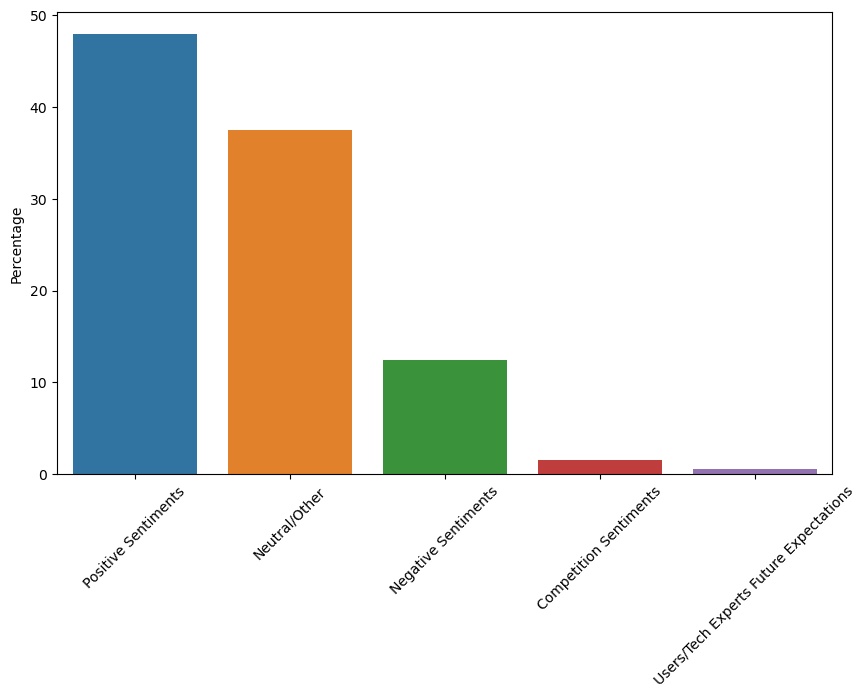

Positive Sentiments                       992
Neutral/Other                             777
Negative Sentiments                       258
Competition Sentiments                     32
Users/Tech Experts Future Expectations     11
Name: category, dtype: int64
Positive Sentiments                       47.922705
Neutral/Other                             37.536232
Negative Sentiments                       12.463768
Competition Sentiments                     1.545894
Users/Tech Experts Future Expectations     0.531401
Name: category, dtype: float64

Positive Sentiments examples: 

['caution  price k is overprice now please buy it under k only otherwise check some other applicationssites for better price',
 'the cpu is overall great for everything itll give you flaw less performance in mediocre level video editing and hardcore level gaming and streaming if you are looking to buy this just for gaming '
 'this is the perfect buy but the only thing disappointing is the stock cooler first of all

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

# Load the dataset with a different encoding
data = pd.read_csv("df.csv", encoding='latin1')

# Assuming the text data is in the 'ReviewContent' column
text_data = data['Review_Content'].dropna()

# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SIA()

# Perform sentiment analysis
results = []
for line in text_data:
    pol_score = sia.polarity_scores(line)
    pol_score['Review_Content'] = line
    results.append(pol_score)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Function to categorize the reviews
def categorize_review(row):
    if row['compound'] > 0.2:
        return 'Positive Sentiments'
    elif row['compound'] < -0.2:
        return 'Negative Sentiments'
    elif any(word in row['Review_Content'].lower() for word in ["competition", "competitor", "amd", "ryzen"]):
        return 'Competition Sentiments'
    elif any(word in row['Review_Content'].lower() for word in ["future", "expect", "next", "anticipate", "upcoming"]):
        return 'Users/Tech Experts Future Expectations'
    else:
        return 'Neutral/Other'

# Apply the categorization function
df['category'] = df.apply(categorize_review, axis=1)

# Save the results to a new DataFrame
df2 = df[['Review_Content', 'category']]
df2.to_csv('file2.csv', encoding='utf-8', index=False)

# Print the counts and percentages of each category
category_counts = df.category.value_counts()
category_percentages = df.category.value_counts(normalize=True) * 100

# Get examples of each category
category_examples = {}
for category in category_counts.index:
    category_examples[category] = list(df[df['category'] == category]['Review_Content'])[:5]

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))
counts = df.category.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

# Output the results
print(category_counts)
print(category_percentages)
for category, examples in category_examples.items():
    print(f"\n{category} examples: \n")
    pprint(examples, width=200)

# Function to classify a user review
def classify_user_review(review):
    pol_score = sia.polarity_scores(review)
    if pol_score['compound'] > 0.2:
        return 'Positive Sentiments'
    elif pol_score['compound'] < -0.2:
        return 'Negative Sentiments'
    else:
        return 'Neutral/Other'

# Take input from the user and classify the review
user_review = input("Enter a review to classify: ")
classification = classify_user_review(user_review)
print(f"User review classification: {classification}")

In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import defaultdict

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Load the dataset with a different encoding
data = pd.read_csv("df.csv", encoding='latin1')

# Clean and preprocess the reviews
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\|\|', ' ', text)  # Replace || with space
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphabetic and non-numeric characters
    text = text.strip()  # Remove leading and trailing spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

data['Cleaned_Review'] = data['Review_Content'].apply(clean_text)

# Sentiment analysis
sia = SIA()
data['Sentiment'] = data['Cleaned_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['Sentiment_Label'] = data['Sentiment'].apply(lambda x: 'Positive' if x > 0.2 else 'Negative' if x < -0.2 else 'Neutral')

# Extract negative reviews for topic modeling
negative_reviews = data[data['Sentiment_Label'] == 'Negative']['Cleaned_Review']

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
negative_review_vectors = vectorizer.fit_transform(negative_reviews)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(negative_review_vectors)

# Get the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)

# Save results to a new DataFrame
data.to_csv('file3.csv', encoding='utf-8', index=False)

# Define keywords for Intel processors context
sku_keywords = ['i9', 'i7', 'i5', 'i3', '14th gen', '13th gen', '12th gen']
technical_features_keywords = ['core', 'thread', 'clock', 'speed', 'performance', 'overclock', 'turbo', 'cache']
design_keywords = ['design', 'heat', 'cooling', 'thermal', 'size', 'form factor']

def extract_features(text, keywords):
    extracted_features = []
    for keyword in keywords:
        if keyword in text:
            extracted_features.append(keyword)
    return extracted_features

data['Extracted_SKU'] = data['Cleaned_Review'].apply(lambda x: extract_features(x, sku_keywords))
data['Extracted_Technical_Features'] = data['Cleaned_Review'].apply(lambda x: extract_features(x, technical_features_keywords))
data['Extracted_Design_Features'] = data['Cleaned_Review'].apply(lambda x: extract_features(x, design_keywords))

# Map features to sentiments
feature_sentiment_map = defaultdict(lambda: defaultdict(list))
for _, row in data.iterrows():
    for feature in row['Extracted_SKU']:
        feature_sentiment_map['SKU'][feature].append(row['Sentiment'])
    for feature in row['Extracted_Technical_Features']:
        feature_sentiment_map['Technical Features'][feature].append(row['Sentiment'])
    for feature in row['Extracted_Design_Features']:
        feature_sentiment_map['Design'][feature].append(row['Sentiment'])

# Group features logically and compute average sentiment
grouped_feature_sentiments = {group: {} for group in feature_sentiment_map.keys()}
for group, features in feature_sentiment_map.items():
    for feature, sentiments in features.items():
        if sentiments:
            grouped_feature_sentiments[group][feature] = {
                'average_sentiment': sum(sentiments) / len(sentiments),
                'sentiment_count': len(sentiments)
            }

# Print grouped feature sentiments
for group, features in grouped_feature_sentiments.items():
    print(f"{group}:")
    for feature, sentiment_info in features.items():
        print(f"  {feature}:")
        print(f"    Average Sentiment: {sentiment_info['average_sentiment']:.2f}")
        print(f"    Sentiment Count: {sentiment_info['sentiment_count']}")

# Example function to classify user input review
def classify_review(review):
    pol_score = sia.polarity_scores(review)
    category = 'General'
    if 'competition' in review.lower():
        category = 'Competition Sentiment'
    elif 'future' in review.lower() or 'expect' in review.lower():
        category = 'Future Expectation'
        
    label = 0
    if pol_score['compound'] > 0.2:
        label = 1
    elif pol_score['compound'] < -0.2:
        label = -1
    
    sentiment = 'Positive' if label == 1 else 'Negative' if label == -1 else 'Neutral'
    combined = f"{category} ({sentiment})"
    
    return {
        'review': review,
        'polarity_scores': pol_score,
        'label': label,
        'category': category,
        'combined': combined
    }

# Example usage of classify_review function
user_review = input("Enter a review: ")
result = classify_review(user_review)
print("\nClassification Result:")
print(result)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Topic #0:
il la intel gen gaming una gpu core leaked 13th
Topic #1:
cpu i9 runs performance temperature motherboard case worst cooler ddr5
Topic #2:
chip say mainboard thousands power card trs asus intel issues
Topic #3:
intel gen 14th 13th 12th cpu know support contact errors
Topic #4:
pc new bsod cpu build games error bad fps problem

Technical Features:
  core:
    Average Sentiment: 0.30
    Sentiment Count: 482
  performance:
    Average Sentiment: 0.61
    Sentiment Count: 246
  thread:
    Average Sentiment: 0.67
    Sentiment Count: 60
  turbo:
    Average Sentiment: 0.28
    Sentiment Count: 15
  cache:
    Average Sentiment: 0.58
    Sentiment Count: 17
  clock:
    Average Sentiment: 0.53
    Sentiment Count: 126
  overclock:
    Average Sentiment: 0.56
    Sentiment Count: 85
  speed:
    Average Sentiment: 0.51
    Sentiment Count: 73
Design:
  cooling:
    Average Sentiment: 0.68
    Sentiment Count: 112
  heat:
    Average Sentiment: 0.56
    Sentiment Count: 100
  desig

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


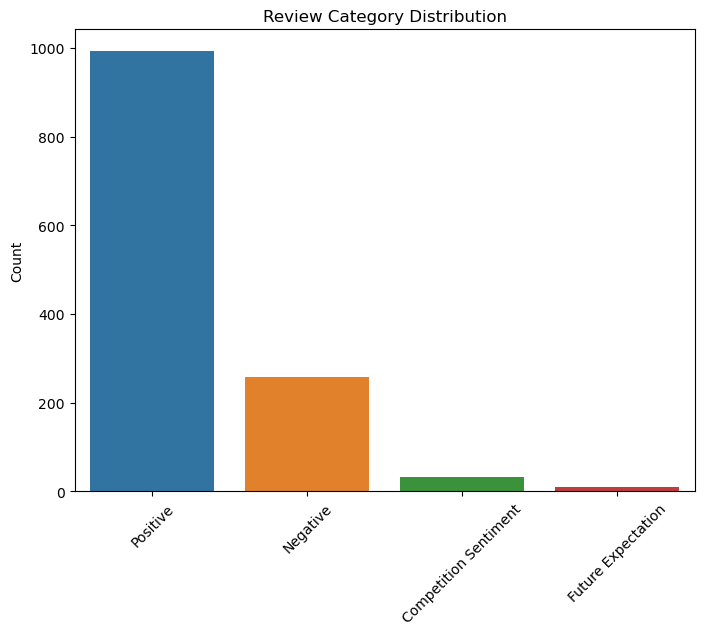

Category Counts:
Positive                 992
Negative                 258
Competition Sentiment     32
Future Expectation        11
Name: category, dtype: int64

Category Percentages:
Positive                 76.720804
Negative                 19.953596
Competition Sentiment     2.474865
Future Expectation        0.850735
Name: category, dtype: float64

Classification Report:
                        precision    recall  f1-score   support

Competition Sentiment       1.00      0.62      0.77         8
   Future Expectation       1.00      0.50      0.67         2
             Negative       0.95      0.44      0.61        45
             Positive       0.88      1.00      0.93       204

             accuracy                           0.88       259
            macro avg       0.96      0.64      0.74       259
         weighted avg       0.89      0.88      0.87       259


Confusion Matrix:
 [[  5   0   0   3]
 [  0   1   0   1]
 [  0   0  20  25]
 [  0   0   1 203]]


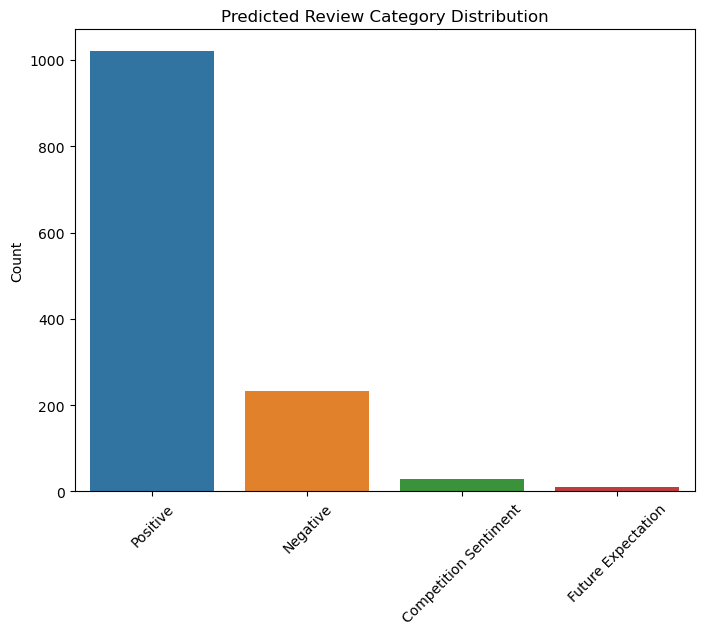

In [14]:
#random forest 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset with a different encoding
data = pd.read_csv("df.csv", encoding='latin1')

# Assuming the text data is in the 'ReviewContent' column
text_data = data['Review_Content'].dropna()

# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SIA()

# Perform sentiment analysis and categorization
results = []
for line in text_data:
    pol_score = sia.polarity_scores(line)
    pol_score['ReviewContent'] = line
    
    # Categorize based on custom rules
    if pol_score['compound'] > 0.2:
        pol_score['category'] = 'Positive'
    elif pol_score['compound'] < -0.2:
        pol_score['category'] = 'Negative'
    elif any(word in line.lower() for word in ["competition", "competitor", "amd", "ryzen"]):
        pol_score['category'] = 'Competition Sentiment'
    elif any(word in line.lower() for word in ["future", "expect", "next", "anticipate", "upcoming"]):
        pol_score['category'] = 'Future Expectation'
    else:
        pol_score['category'] = 'Other'
    
    results.append(pol_score)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Filter for the four specified categories
df = df[df['category'].isin(['Positive', 'Negative', 'Competition Sentiment', 'Future Expectation'])]

# Save the results to a new DataFrame
df.to_csv('amazonxreddit_data_categorized.csv', encoding='utf-8', index=False)

# Print the counts and percentages of each category
category_counts = df['category'].value_counts()
category_percentages = df['category'].value_counts(normalize=True) * 100

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts, ax=ax)
ax.set_ylabel("Count")
ax.set_title("Review Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Output the results
print("Category Counts:")
print(category_counts)
print("\nCategory Percentages:")
print(category_percentages)

# Text preprocessing
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['ReviewContent']).toarray()
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict sentiment labels
y_pred = rfc.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Add the predicted labels to the dataframe
df['predicted_category'] = rfc.predict(tfidf.transform(df['ReviewContent']).toarray())

# Save the results with predicted labels
df.to_csv('file4.csv', encoding='utf-8', index=False)

# Visualize the prediction results
fig, ax = plt.subplots(figsize=(8, 6))
prediction_counts = df['predicted_category'].value_counts()
sns.barplot(x=prediction_counts.index, y=prediction_counts, ax=ax)
ax.set_ylabel("Count")
ax.set_title("Predicted Review Category Distribution")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


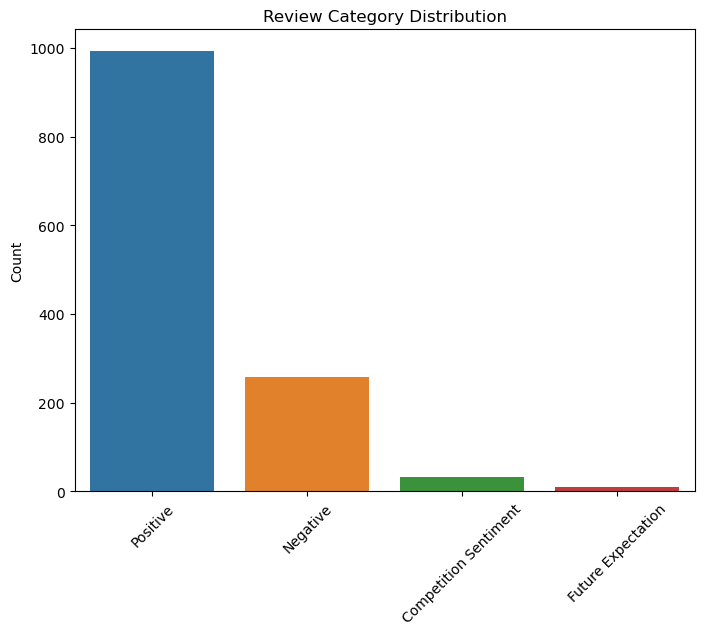

Category Counts:
Positive                 992
Negative                 258
Competition Sentiment     32
Future Expectation        11
Name: category, dtype: int64

Category Percentages:
Positive                 76.720804
Negative                 19.953596
Competition Sentiment     2.474865
Future Expectation        0.850735
Name: category, dtype: float64
Classification Report:
                        precision    recall  f1-score   support

Competition Sentiment       1.00      0.38      0.55         8
   Future Expectation       1.00      0.50      0.67         2
             Negative       0.95      0.44      0.61        45
             Positive       0.87      1.00      0.93       204

             accuracy                           0.88       259
            macro avg       0.95      0.58      0.69       259
         weighted avg       0.89      0.88      0.86       259

Confusion Matrix:
 [[  3   0   0   5]
 [  0   1   0   1]
 [  0   0  20  25]
 [  0   0   1 203]]


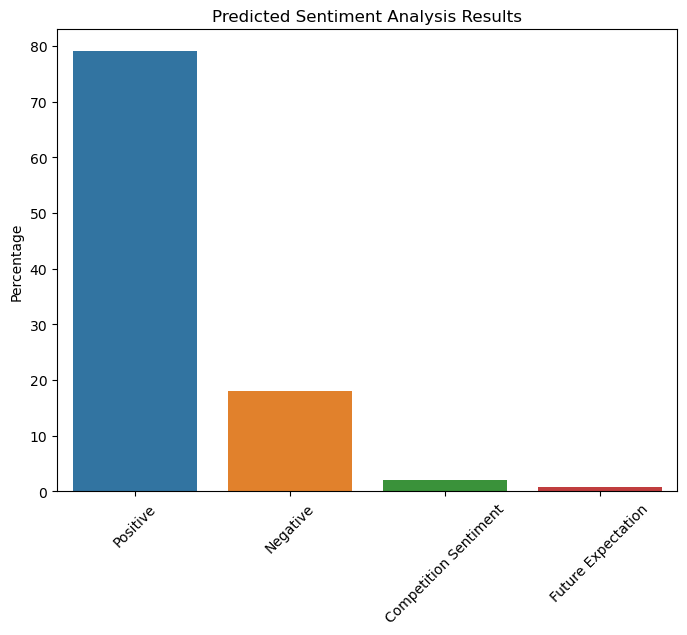

In [17]:
#svd model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset with a different encoding
data = pd.read_csv("df.csv", encoding='latin1')

# Assuming the text data is in the 'ReviewContent' column
text_data = data['Review_Content'].dropna()

# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SIA()

# Perform sentiment analysis and categorization
results = []
for line in text_data:
    pol_score = sia.polarity_scores(line)
    pol_score['ReviewContent'] = line
    
    # Categorize based on custom rules
    if pol_score['compound'] > 0.2:
        pol_score['category'] = 'Positive'
    elif pol_score['compound'] < -0.2:
        pol_score['category'] = 'Negative'
    elif any(word in line.lower() for word in ["competition", "competitor", "amd", "ryzen"]):
        pol_score['category'] = 'Competition Sentiment'
    elif any(word in line.lower() for word in ["future", "expect", "next", "anticipate", "upcoming"]):
        pol_score['category'] = 'Future Expectation'
    else:
        pol_score['category'] = 'Other'
    
    results.append(pol_score)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Filter for the four specified categories
df = df[df['category'].isin(['Positive', 'Negative', 'Competition Sentiment', 'Future Expectation'])]

# Save the results to a new DataFrame
df.to_csv('file50.csv', encoding='utf-8', index=False)

# Print the counts and percentages of each category
category_counts = df['category'].value_counts()
category_percentages = df['category'].value_counts(normalize=True) * 100

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts, ax=ax)
ax.set_ylabel("Count")
ax.set_title("Review Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Output the results
print("Category Counts:")
print(category_counts)
print("\nCategory Percentages:")
print(category_percentages)

# Text preprocessing
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['ReviewContent']).toarray()
y = df['category']

# Apply Truncated SVD for dimensionality reduction
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict sentiment labels
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Add the predicted labels to the dataframe
df['predicted_category'] = rfc.predict(svd.transform(tfidf.transform(df['ReviewContent']).toarray()))

# Save the results with predicted labels
df.to_csv('file51.csv', encoding='utf-8', index=False)

# Visualize the prediction results
fig, ax = plt.subplots(figsize=(8, 6))
prediction_counts = df['predicted_category'].value_counts(normalize=True) * 100
sns.barplot(x=prediction_counts.index, y=prediction_counts, ax=ax)
ax.set_ylabel("Percentage")
ax.set_title("Predicted Sentiment Analysis Results")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


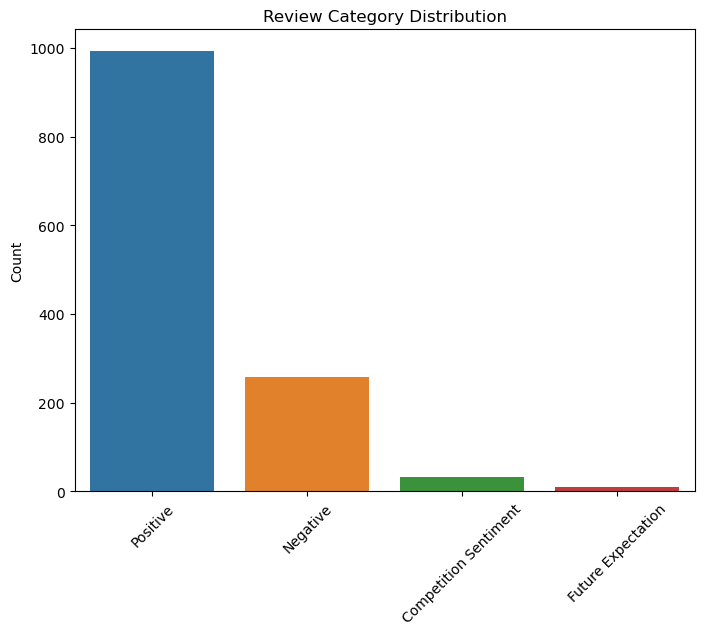

Category Counts:
Positive                 992
Negative                 258
Competition Sentiment     32
Future Expectation        11
Name: category, dtype: int64

Category Percentages:
Positive                 76.720804
Negative                 19.953596
Competition Sentiment     2.474865
Future Expectation        0.850735
Name: category, dtype: float64


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                        precision    recall  f1-score   support

Competition Sentiment       0.50      0.25      0.33         8
   Future Expectation       0.00      0.00      0.00         2
             Negative       0.80      0.36      0.49        45
             Positive       0.85      0.98      0.91       204

             accuracy                           0.84       259
            macro avg       0.54      0.40      0.43       259
         weighted avg       0.82      0.84      0.81       259

Confusion Matrix:
 [[  2   0   1   5]
 [  0   0   0   2]
 [  0   0  16  29]
 [  2   0   3 199]]


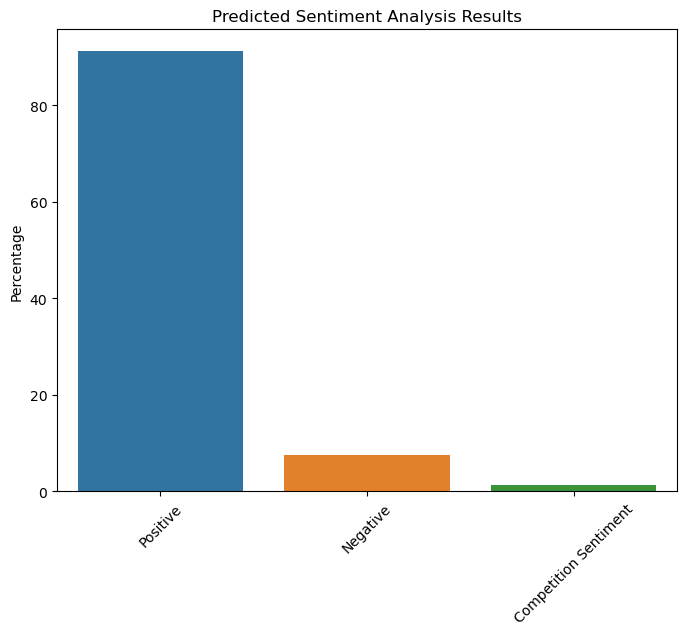

In [18]:
#linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset with a different encoding
data = pd.read_csv("df.csv", encoding='latin1')

# Assuming the text data is in the 'ReviewContent' column
text_data = data['Review_Content'].dropna()

# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SIA()

# Perform sentiment analysis and categorization
results = []
for line in text_data:
    pol_score = sia.polarity_scores(line)
    pol_score['ReviewContent'] = line
    
    # Categorize based on custom rules
    if pol_score['compound'] > 0.2:
        pol_score['category'] = 'Positive'
    elif pol_score['compound'] < -0.2:
        pol_score['category'] = 'Negative'
    elif any(word in line.lower() for word in ["competition", "competitor", "amd", "ryzen"]):
        pol_score['category'] = 'Competition Sentiment'
    elif any(word in line.lower() for word in ["future", "expect", "next", "anticipate", "upcoming"]):
        pol_score['category'] = 'Future Expectation'
    else:
        pol_score['category'] = 'Other'
    
    results.append(pol_score)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Filter for the four specified categories
df = df[df['category'].isin(['Positive', 'Negative', 'Competition Sentiment', 'Future Expectation'])]

# Save the results to a new DataFrame
df.to_csv('file60.csv', encoding='utf-8', index=False)

# Print the counts and percentages of each category
category_counts = df['category'].value_counts()
category_percentages = df['category'].value_counts(normalize=True) * 100

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts, ax=ax)
ax.set_ylabel("Count")
ax.set_title("Review Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Output the results
print("Category Counts:")
print(category_counts)
print("\nCategory Percentages:")
print(category_percentages)

# Text preprocessing
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['ReviewContent']).toarray()
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model with L1 regularization
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predict sentiment labels
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




# Add the predicted labels to the dataframe
df['predicted_category'] = log_reg.predict(tfidf.transform(df['ReviewContent']).toarray())

# Save the results with predicted labels
df.to_csv('file61.csv', encoding='utf-8', index=False)

# Visualize the prediction results
fig, ax = plt.subplots(figsize=(8, 6))
prediction_counts = df['predicted_category'].value_counts(normalize=True) * 100
sns.barplot(x=prediction_counts.index, y=prediction_counts, ax=ax)
ax.set_ylabel("Percentage")
ax.set_title("Predicted Sentiment Analysis Results")
plt.xticks(rotation=45)
plt.show()